In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.dummy import DummyRegressor
from sklearn import metrics
from sklearn.linear_model import ElasticNetCV

# Шаг 1. Изучение общей информации

Загрузка датасета

In [ ]:
df_games=pd.read_csv("games.csv")

Просмотр первых 10 строк

In [ ]:
df_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Просмотр основных статистических показателей

In [ ]:
df_games.describe().round(2)

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


Просмотр типов данных

In [ ]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# 2 Подготовка данных

# 2.1 .Преобразование столбцов к нижнему регистру

In [ ]:
df_games.columns=df_games.columns.str.lower()

In [ ]:
df_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


# 2.2 Преобразование данных в нужные типы и обработка пропусков

Посмотрим процент пропусков по каждому столбцу

In [ ]:
total_rows = len(df_games)
for column in df_games.columns:
  if df_games[column].isnull().any():
    nan_count = df_games[column].isnull().sum()
    nan_percentage = (nan_count / total_rows) * 100
    print('Столбец с NaN:', column)
    print(f'Процент пропущенных значений: {nan_percentage:.2f}%')

Столбец с NaN: name
Процент пропущенных значений: 0.01%
Столбец с NaN: year_of_release
Процент пропущенных значений: 1.61%
Столбец с NaN: genre
Процент пропущенных значений: 0.01%
Столбец с NaN: critic_score
Процент пропущенных значений: 51.32%
Столбец с NaN: user_score
Процент пропущенных значений: 40.09%
Столбец с NaN: rating
Процент пропущенных значений: 40.48%


Видно что больше всего пропущенных значений в столбцах  critic_score, user_score, rating


Замена года выпуска на int из-за того что год это целое число а не вещественное

In [ ]:
df_games['year_of_release']=df_games['year_of_release'].astype('Int64')


In [ ]:
df_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В user_score содержится оценка "TBD" (To Be Determined) в оценках игр обычно указывает на то что игра не получила достатончное количество оценок для выставления рейтинга.TBD по сути то же самое что и nan и поэтому нужно избавится от tbd чтобы привести user_score к float.Замена нужна потому что оценка игроков может быть не обязательно целым числом.

In [ ]:
df_games['user_score']=df_games['user_score'].replace('tbd',np.NaN)
df_games['user_score']=df_games['user_score'].fillna(-1.0)
df_games['user_score']=df_games['user_score'].astype('float')

In [ ]:
df_games['user_score'].unique()

array([ 8. , -1. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,  4.9,
        4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,  4.4,
        4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,  2.5,
        1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,  3.8,
        0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

Т.к. пользовтельская оценка это субъективное мнение поэтому нельзя просто так выставлять например среднюю оценку на основе каких-либо данных.Поэтому заменим NaN на любое отрицательное число в данном случае -1.

Замена оценки критиков с float на int потому что они  обычно  ставят оценку целым числом от 0 до 100

In [ ]:
df_games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [ ]:
df_games['critic_score']=df_games['critic_score'].astype('Int64')
df_games['critic_score']=df_games['critic_score'].fillna(-1)

По той же самой причине что и оценка игроков,пропуски заполним -1.

Можно использовать самую часто встречающуюся оценку для рейтинга.

In [ ]:
df_games['rating'].fillna(df_games['rating'].mode()[0], inplace=True)

In [ ]:
total_rows = len(df_games)
for column in df_games.columns:
  if df_games[column].isnull().any():
    nan_count = df_games[column].isnull().sum()
    nan_percentage = (nan_count / total_rows) * 100
    print('Столбец с NaN:', column)
    print(f'Процент пропущенных значений: {nan_percentage:.2f}%')

Столбец с NaN: name
Процент пропущенных значений: 0.01%
Столбец с NaN: year_of_release
Процент пропущенных значений: 1.61%
Столбец с NaN: genre
Процент пропущенных значений: 0.01%


Как видно что процент пропущенных занчений минимальный и дальнейшая подготовка данных не нужна

# 2.3 Подсчет суммарных продаж во всех регионах

In [ ]:
df_games['total_sales']=df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

In [ ]:
df_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,E,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,-1.0,E,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,-1.0,E,28.31


## Шаг 3 Исследовательский анализ данных

# 3.1 Сколько игр выпускалось в разные годы.

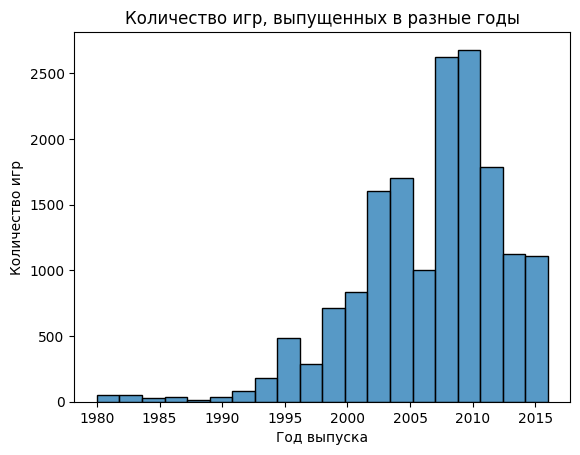

In [ ]:
sns.histplot(data=df_games, x='year_of_release', bins=20)
plt.title('Количество игр, выпущенных в разные годы')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

Возьмем 5 платформ с наибольшими суммарными продажами

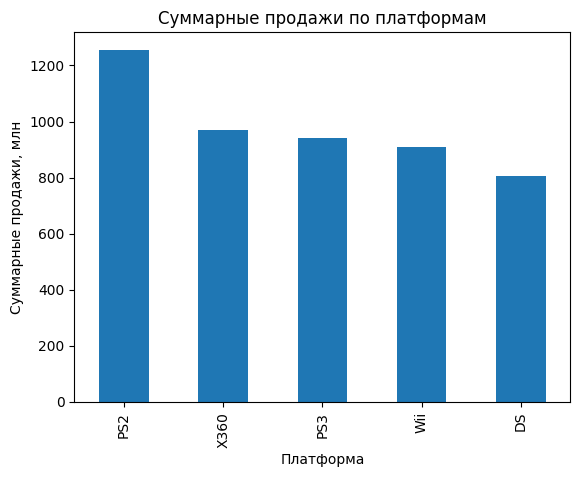

In [ ]:
platform_sales = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5)
platform_sales.plot(kind='bar')
plt.title('Суммарные продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи, млн')
plt.show()

# 3.2 Распределение продаж по годам

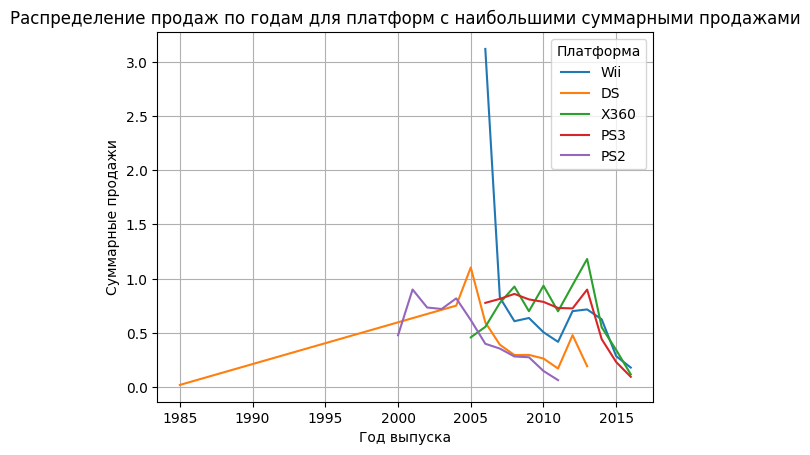

In [ ]:
top_platforms_df = df_games[df_games['platform'].isin(platform_sales.index)]
sns.lineplot(data=top_platforms_df, x='year_of_release', y='total_sales', hue='platform',errorbar=None)
plt.title('Распределение продаж по годам для платформ с наибольшими суммарными продажами')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.legend(title='Платформа')
plt.grid(True)
plt.show()

# 3.3 Выбор актуального периода

Выберем период с 2006 года

In [ ]:
df_period = df_games[df_games['year_of_release'] >= 2006]

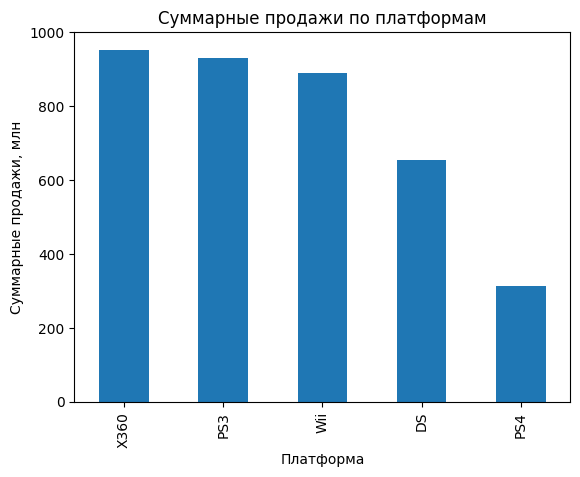

In [ ]:
platform_sales = df_period.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5)
platform_sales.plot(kind='bar')
plt.title('Суммарные продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи, млн')
plt.show()

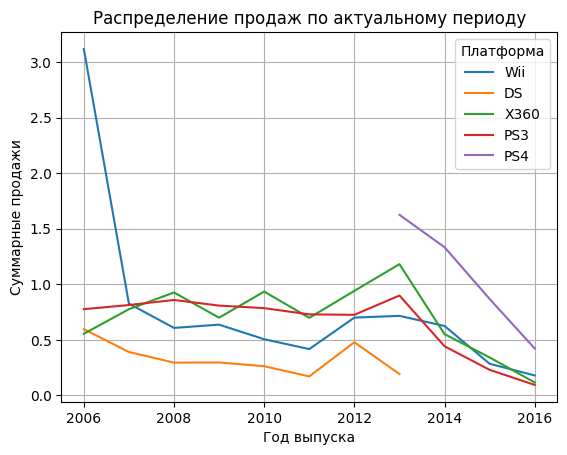

In [ ]:
top_platforms_df = df_period[df_period['platform'].isin(platform_sales.index)]
sns.lineplot(data=top_platforms_df, x='year_of_release', y='total_sales', hue='platform',errorbar=None)
plt.title('Распределение продаж по актуальному периоду')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.legend(title='Платформа')
plt.grid(True)
plt.show()

Из графика что на конец 2016 года лидируют ps4,wii,x360. Качество вышедших игр влияет на общее кол-во проданных копий. Наиболее прибыльной платформой является ps4 т.к. жизненый цикл консоли примерно 5-10 лет.

# 3.4 График по глобальным продажам игр в разбивке по платформам "ящик с усами".

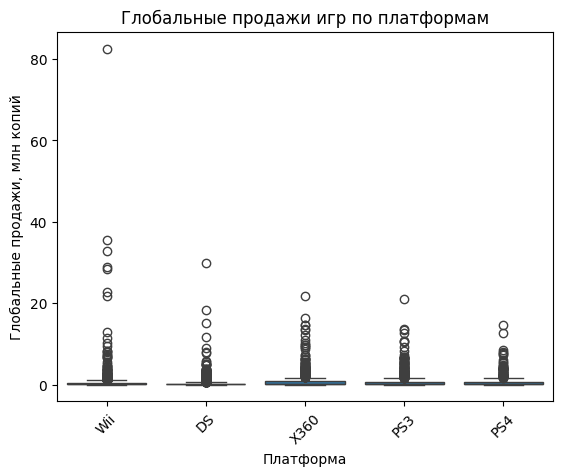

In [ ]:
sns.boxplot(data=top_platforms_df, x='platform', y='total_sales')
plt.title('Глобальные продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи, млн копий')
plt.xticks(rotation=45)
plt.show()

Рейтинг платформ по глобальным продажам:

1.   wii
2.   ds
3.   x360


# 3.4 Влияние отзывов и критиков на продажи внутри популярной платформы

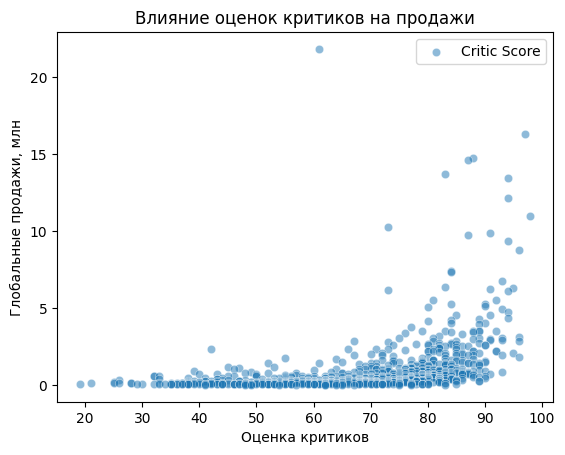

In [ ]:
x360_df = top_platforms_df[(top_platforms_df['platform'] == 'X360') &
                           (top_platforms_df['critic_score']>0 )].copy()
sns.scatterplot(data=x360_df, x='critic_score', y='total_sales', alpha=0.5, label='Critic Score')
plt.title('Влияние оценок критиков на продажи')
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи, млн')
plt.legend()
plt.show()

Из графика видно что чем лучше оценки критиков у игры тем больше ее копий продается.  

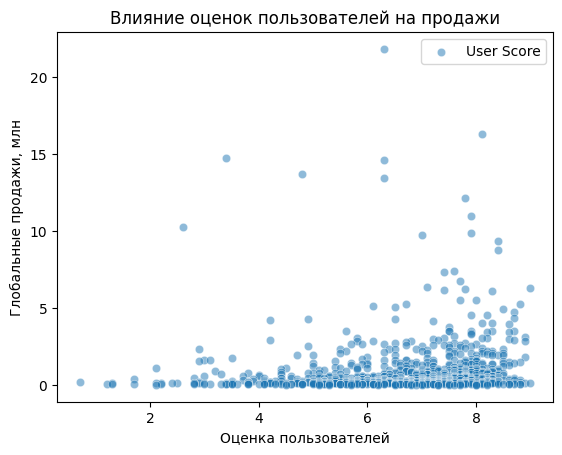

In [ ]:
x360_df = top_platforms_df[(top_platforms_df['platform'] == 'X360') &
                           (top_platforms_df['user_score']>0 )].copy()
sns.scatterplot(data=x360_df, x='user_score', y='total_sales', alpha=0.5, label='User Score')
plt.title('Влияние оценок пользователей на продажи')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи, млн')
plt.legend()
plt.show()

Оценка пользователей так же влияет на  кол-во проданных копий но в меньшей степени.

In [ ]:
correlation = x360_df[['critic_score', 'user_score', 'total_sales']].corr()
print(correlation)

              critic_score  user_score  total_sales
critic_score      1.000000    0.518292     0.302245
user_score        0.518292    1.000000     0.115762
total_sales       0.302245    0.115762     1.000000


Оценка пользователей не так сильно влияет как оценки критиков.

# 3.4 Общее распределение игр по жанрам.

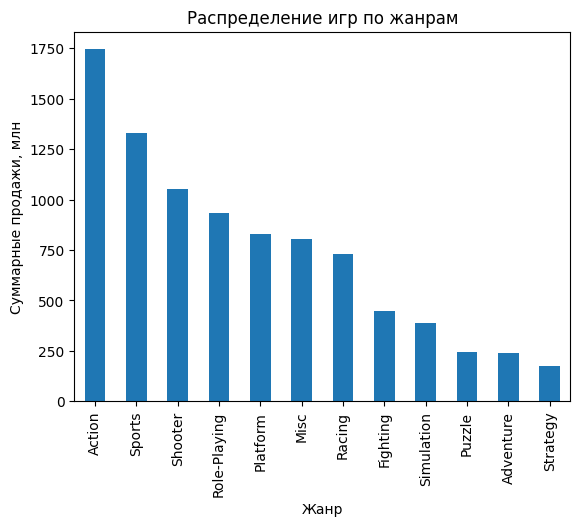

In [ ]:
platform_sales = df_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
platform_sales.plot(kind='bar')
plt.title('Распределение игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи, млн')
plt.show()

Самые высокие продажи у экшенов, шутеров, спортивных симуляторов и ролевых игр.У экшенов т.к. это обычно одиночные игры с сюжетом в которые могут понравится большинсвту игроков.

# Шаг 4 Портрет пользователя каждого региона

# 4.1 Самые популярные платформы

In [ ]:
top_platforms_na = df_games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_eu = df_games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_jp = df_games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

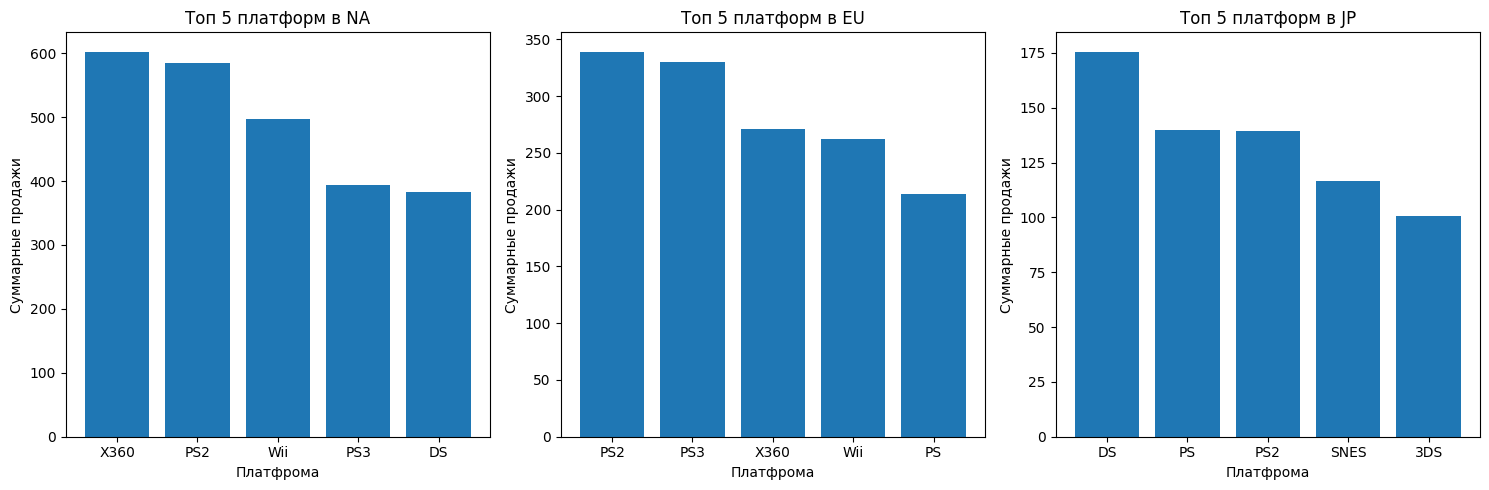

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

axes[0].bar(top_platforms_na.index, top_platforms_na.values)
axes[0].set_title('Топ 5 платформ в NA')
axes[0].set_xlabel('Платфрома')
axes[0].set_ylabel('Суммарные продажи')

axes[1].bar(top_platforms_eu.index, top_platforms_eu.values)
axes[1].set_title('Топ 5 платформ в EU')
axes[1].set_xlabel('Платфрома')
axes[1].set_ylabel('Суммарные продажи')

axes[2].bar(top_platforms_jp.index, top_platforms_jp.values)
axes[2].set_title('Топ 5 платформ в JP')
axes[2].set_xlabel('Платфрома')
axes[2].set_ylabel('Суммарные продажи')

plt.tight_layout()
plt.show()

В NA больше всего предпочитают x360 и ps2 практически иду вровень, а остальные консоли отстают.


В EU уже большей степени предпочитают консоли от Sony они занимают первые два места, x360 и wii идут пркатически равно,а ps находится в аутсайдерах.


А вот в JP  больше всего предпочитают только консоли от nintendo и Sony компании которые основаны в японии.

# 4.2 Самые популярные жанры

In [ ]:
top_genres_na = df_games.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genres_eu = df_games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_genres_jp = df_games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

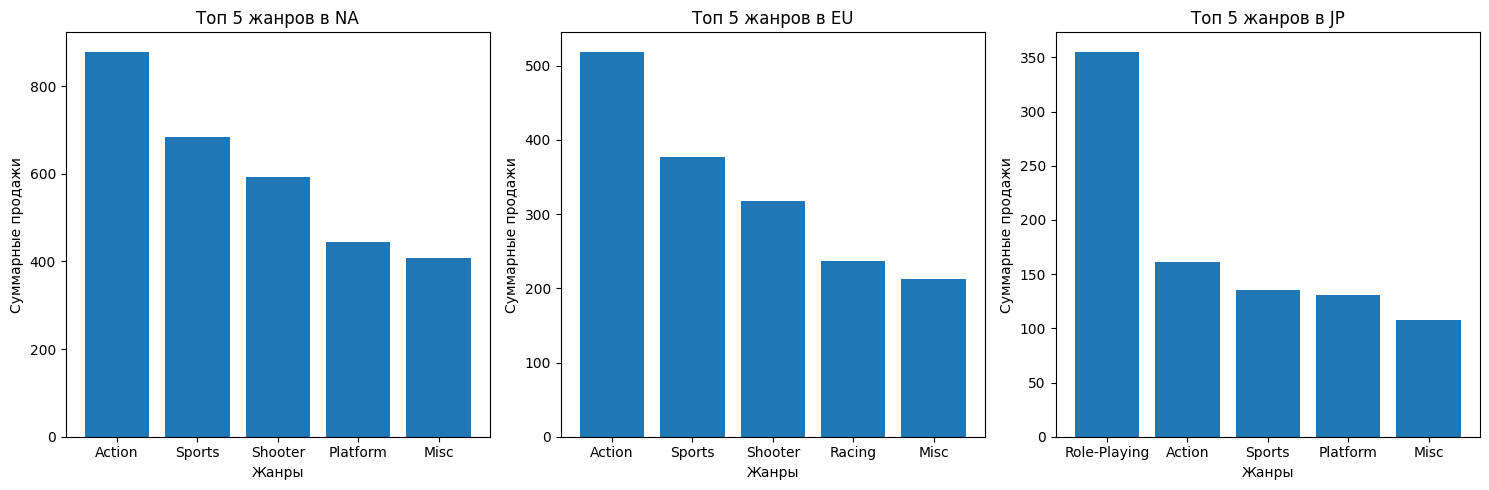

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

axes[0].bar(top_genres_na.index, top_genres_na.values)
axes[0].set_title('Топ 5 жанров в NA')
axes[0].set_xlabel('Жанры')
axes[0].set_ylabel('Суммарные продажи')

axes[1].bar(top_genres_eu.index, top_genres_eu.values)
axes[1].set_title('Топ 5 жанров в EU')
axes[1].set_xlabel('Жанры')
axes[1].set_ylabel('Суммарные продажи')

axes[2].bar(top_genres_jp.index, top_genres_jp.values)
axes[2].set_title('Топ 5 жанров в JP')
axes[2].set_xlabel('Жанры')
axes[2].set_ylabel('Суммарные продажи')

plt.tight_layout()
plt.show()

В NA и EU пользователи предпочитают практически одинаковые жанры отличаюбтся только platform и racing.

В JP лидирует rp с большим отрывом т.к. в японии больше предпочитают ролевые игры.

# 4.3 Влияние рейтинга ESRB на продажи в отдельном регионе

In [ ]:
top_genres_na = df_games.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genres_eu = df_games.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_genres_jp = df_games.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5)

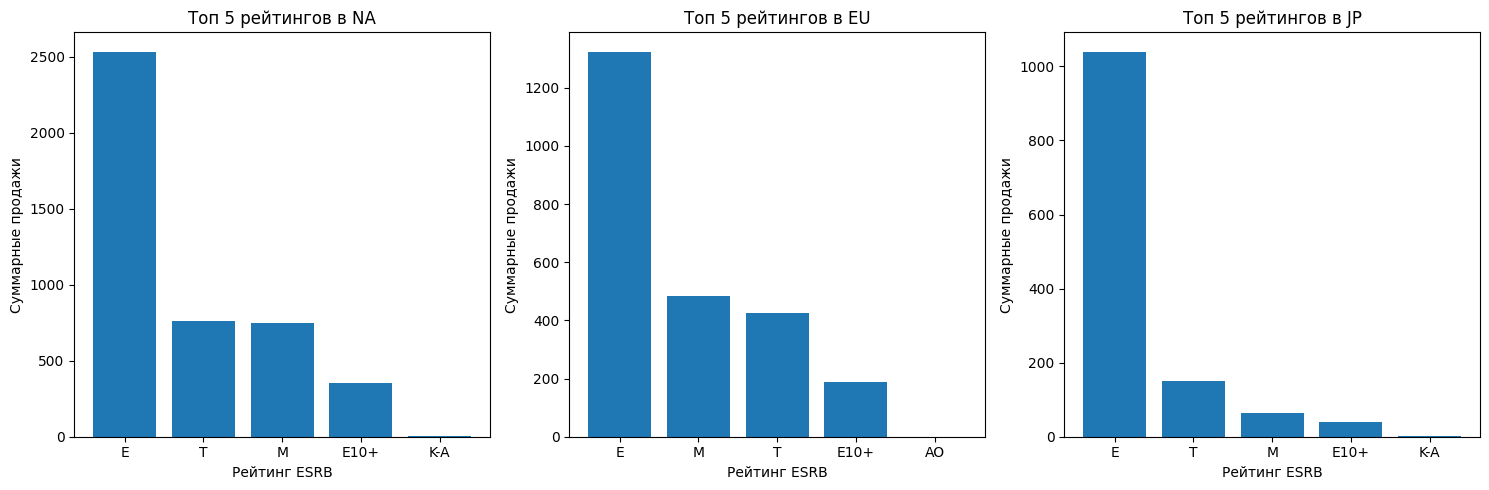

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

axes[0].bar(top_genres_na.index, top_genres_na.values)
axes[0].set_title('Топ 5 рейтингов в NA')
axes[0].set_xlabel('Рейтинг ESRB')
axes[0].set_ylabel('Суммарные продажи')

axes[1].bar(top_genres_eu.index, top_genres_eu.values)
axes[1].set_title('Топ 5 рейтингов в EU')
axes[1].set_xlabel('Рейтинг ESRB')
axes[1].set_ylabel('Суммарные продажи')

axes[2].bar(top_genres_jp.index, top_genres_jp.values)
axes[2].set_title('Топ 5 рейтингов в JP')
axes[2].set_xlabel('Рейтинг ESRB')
axes[2].set_ylabel('Суммарные продажи')

plt.tight_layout()
plt.show()

Из графика видно что во всех регионах на первом месте по продажам всегда стоит оценка E. Дальше уже идут различия между NA и EU что на втором месте в NA идет рейтинг T а в EU M. На предпоследних местах везде стоит E10+. В японии самые низкие продажи по T и M.

# Шаг 5 Пострение модели

Подготовка данных

In [ ]:
mask = (df_games['critic_score'] >= 0)
filtered_df = df_games[mask]
X = filtered_df[['critic_score']].values
y = filtered_df['total_sales'].values


Распределение на обучающие 80% и тестовые наборы 20%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Обучение модели GradientBoosting и предсказание на тестовом наборе

In [ ]:
model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)
print("Шанс на успех игры:", y_pred_gb[0])

Шанс на успех игры: 0.43984011523200234


Метрики модели

In [ ]:
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
e_v_gb = explained_variance_score(y_test, y_pred_gb)
print("GradientBoosting Mean Squared Error:", mse_gb)
print("GradientBoosting Mean Absolute Error:", mae_gb)
print("GradientBoosting R-squared:", r2_gb)
print("GradientBoosting Explained Variance Score:", e_v_gb)

GradientBoosting Mean Squared Error: 1.2883435546283668
GradientBoosting Mean Absolute Error: 0.5934375669939044
GradientBoosting R-squared: 0.28435959160775093
GradientBoosting Explained Variance Score: 0.2844138672803713


Обучение модели AdaBoost и предсказание на тестовом наборе

In [ ]:
model_ada = AdaBoostRegressor()
model_ada.fit(X_train, y_train)
y_pred_ada = model_ada.predict(X_test)
print("Шанс на успех игры:", y_pred_ada[0])

Шанс на успех игры: 0.5206445182724244


Метрики модели

In [ ]:
mse_ada = mean_squared_error(y_test, y_pred_ada)
mae_ada = mean_absolute_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)
e_v_ada = explained_variance_score(y_test, y_py_pred_ada)

print("AdaBoost Mean Squared Error:", mse_ada)
print("AdaBoost Mean Absolute Error:", mae_ada)
print("AdaBoost R-squared:", r2_ada)
print("AdaBoost Explained Variance Score:", e_v_ada)

AdaBoost Mean Squared Error: 1.2777338539091954
AdaBoost Mean Absolute Error: 0.5828542225220853
AdaBoost R-squared: 0.2902529967699924
AdaBoost Explained Variance Score: 0.29059574495922735


Обучение модели ElasticNetCV и предсказание на тестовом наборе

In [ ]:
model_ecv = ElasticNetCV()
model_ecv.fit(X_train, y_train)
y_pred_ecv = model_ecv.predict(X_test)
print("ElasticNetCV шанс на успех игры:", y_pred_ecv[0])

ElasticNetCV шанс на успех игры: 0.7207304213671135


Метрики модели

In [ ]:
mse_ecv = mean_squared_error(y_test, y_pred_ecv)
mae_ecv = mean_absolute_error(y_test, y_pred_ecv)
r2_ecv = r2_score(y_test, y_pred_ecv)
e_v_ecv = explained_variance_score(y_test, y_pred_ecv)
print("ElasticNetCV Mean Squared Error:", mse_ecv)
print("ElasticNetCV Mean Absolute Error:", mae_ecv)
print("ElasticNetCV R-squared:", r2_ecv)
print("ElasticNetCV Explained Variance Score:", e_v_ecv)

ElasticNetCV Mean Squared Error: 1.5617174519062607
ElasticNetCV Mean Absolute Error: 0.6759808254582577
ElasticNetCV R-squared: 0.1325076986954089
ElasticNetCV Explained Variance Score: 0.13250825992933812


Обучение модели Dummy и предсказание на тестовом наборе

In [ ]:
model_dummy = DummyRegressor(strategy='mean')
model_dummy.fit(X_train, y_train)
y_pred_dummy = model_dummy.predict(X_test)
print("Dummy шанс на успех игры:",y_pred_dummy[0])

Dummy шанс на успех игры: 0.6884252573359964


In [ ]:
mse_dummy = mean_squared_error(y_test, y_pred_dummy)
mae_dummy = mean_absolute_error(y_test, y_pred_dummy)
r2_dummy = r2_score(y_test, y_pred_dummy)
e_v_dummy = explained_variance_score(y_test, y_pred_dummy)
print("DummyModel Mean Squared Error:", mse_dummy)
print("DummyModel Mean Absolute Error:", mae_dummy)
print("DummyModel R-squared:", r2_dummy)
print("DummyModel Explained Variance Score:", e_v_dummy)

DummyModel Mean Squared Error: 1.800269338809167
DummyModel Mean Absolute Error: 0.7116414325958803
DummyModel R-squared: -1.4982130061014232e-06
DummyModel Explained Variance Score: 1.1102230246251565e-16


# Шаг 6 общий вывод

Исходя из представленных метрик, лучше всего себя показала модель AdaBoost.Рынок JP значительно отличается от NA и EU как в выборе жанров так и в выборе консолей.